### Exploring the data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

In [7]:
df = pd.read_csv('sales.csv')

In [8]:
df.head()

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5095 non-null   float64
 1   State_Code           5095 non-null   object 
 2   Customer_Name        5095 non-null   object 
 3   Order_Date           5095 non-null   object 
 4   Status               5095 non-null   object 
 5   Product              5095 non-null   object 
 6   Category             5095 non-null   object 
 7   Brand                5095 non-null   object 
 8   Cost                 5095 non-null   float64
 9   Sales                5095 non-null   float64
 10  Quantity             5095 non-null   float64
 11  Total_Cost           5095 non-null   float64
 12  Total_Sales          5095 non-null   float64
 13  Assigned Supervisor  5095 non-null   object 
dtypes: float64(6), object(8)
memory usage: 559.0+ KB


In [10]:
df.describe()

,Order_Number,Cost,Sales,Quantity,Total_Cost,Total_Sales
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,141921.000000,6066.123651,7885.960746,2.486948,14991.778214,19489.311678
std,1470.944141,3952.022039,5137.628651,1.113581,12574.918427,16347.393955
min,139374.000000,350.000000,455.000000,1.000000,350.000000,455.000000
25%,140647.500000,2100.000000,2730.000000,2.000000,4500.000000,5850.000000
50%,141921.000000,6550.000000,8515.000000,2.000000,10720.000000,13936.000000
75%,143194.500000,8500.000000,11050.000000,3.000000,22950.000000,29835.000000
max,144468.000000,14500.000000,18850.000000,4.000000,58000.000000,75400.000000


### Bar Chart: Sales by Product Category

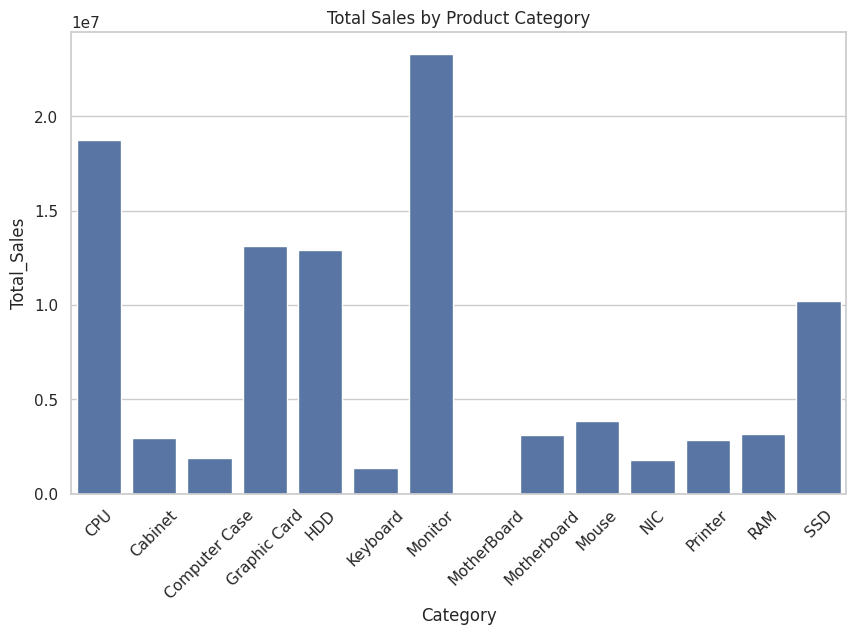

In [11]:
sales_by_category = df.groupby('Category')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Total_Sales', data=sales_by_category)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

### Pie Chart: Sales by Region

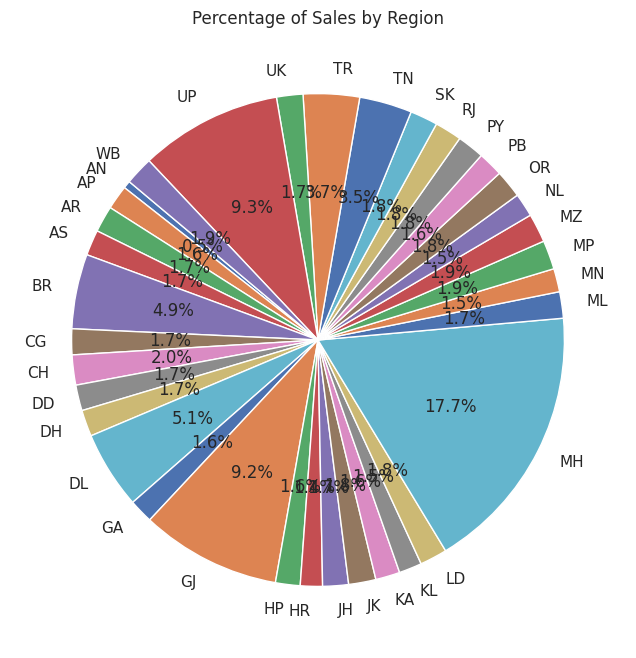

In [12]:
sales_by_region = df.groupby('State_Code')['Total_Sales'].sum()

plt.figure(figsize=(8,8))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sales by Region')
plt.show()

### Line Plot: Sales Trend over time

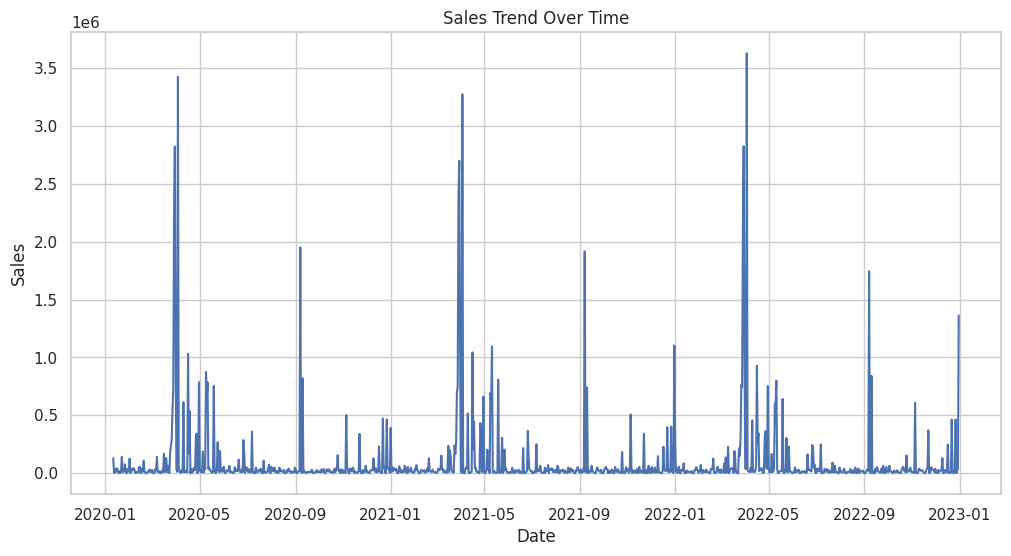

In [14]:
# df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'],dayfirst=True)

daily_sales = df.groupby('Order_Date')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Order_Date', y='Total_Sales', data=daily_sales)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Scatter Plot: Sales vs Cost

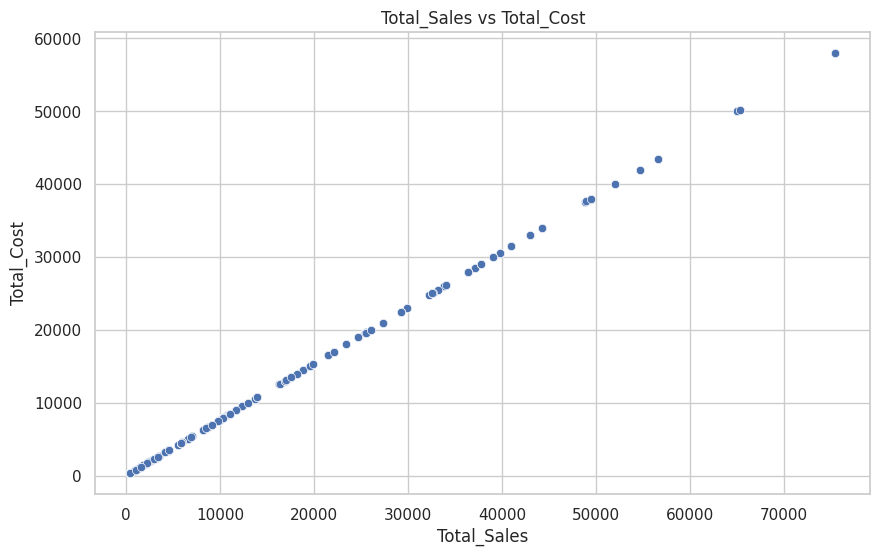

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total_Sales', y='Total_Cost', data=df)
plt.title('Total_Sales vs Total_Cost')
plt.xlabel('Total_Sales')
plt.ylabel('Total_Cost')
plt.show()

### Histogram: Distribution of Sales Values

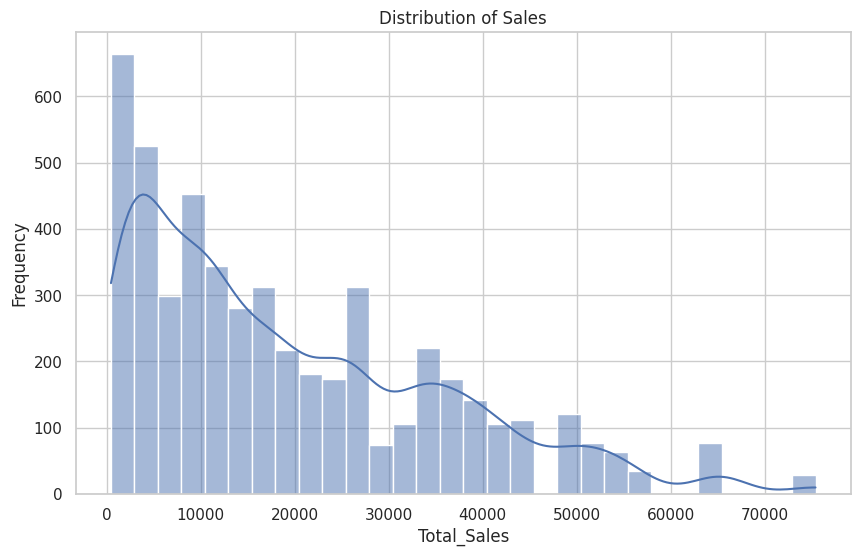

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Total_Sales')
plt.ylabel('Frequency')
plt.show()

### Bubble Plot: Sales, Cost, Quantity

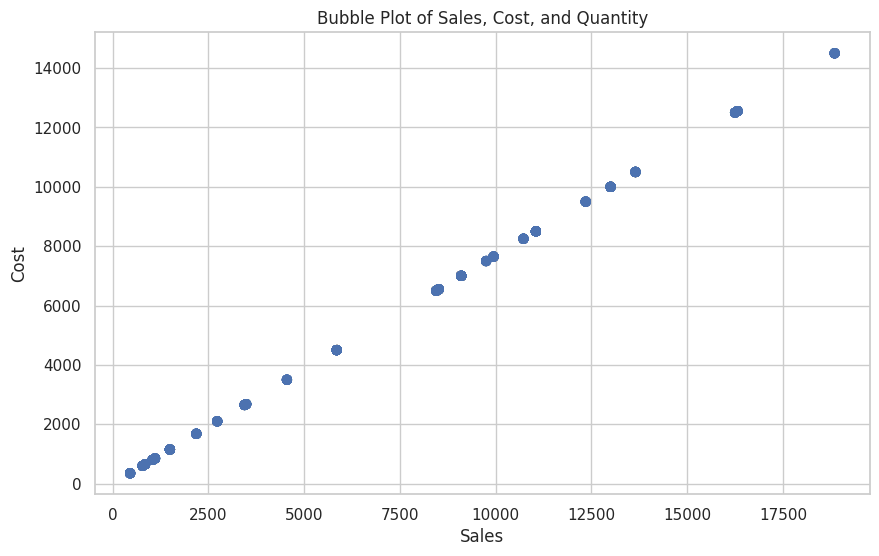

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(df['Sales'], df['Cost'], s=df['Quantity']*10, alpha=0.5)
plt.title('Bubble Plot of Sales, Cost, and Quantity')
plt.xlabel('Sales')
plt.ylabel('Cost')
plt.show()